<a href="https://colab.research.google.com/github/AisyaChalvinaIzumi/AisyaChalvinaIzumi/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Test No. 273**

In [11]:
import numpy as np
import cv2
import cv2 as cv
from matplotlib import  pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

In [12]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype =='gray':
    plt.imshow(img,cmap='gray')
  elif ctype =='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

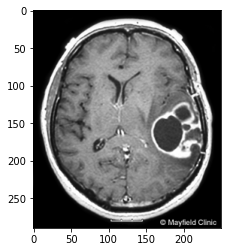

In [13]:
img4 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y73.jpg')

plt.imshow(img4)

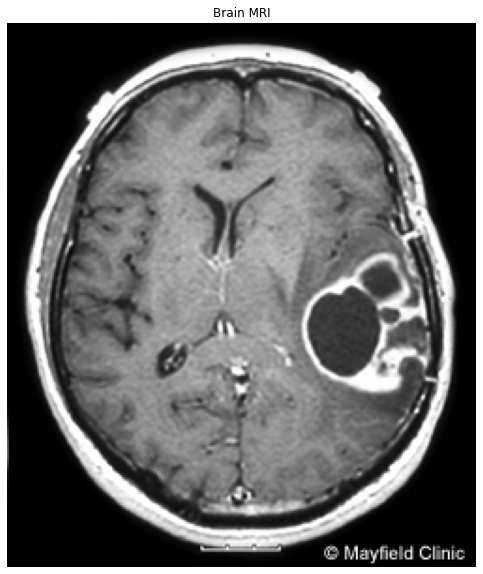

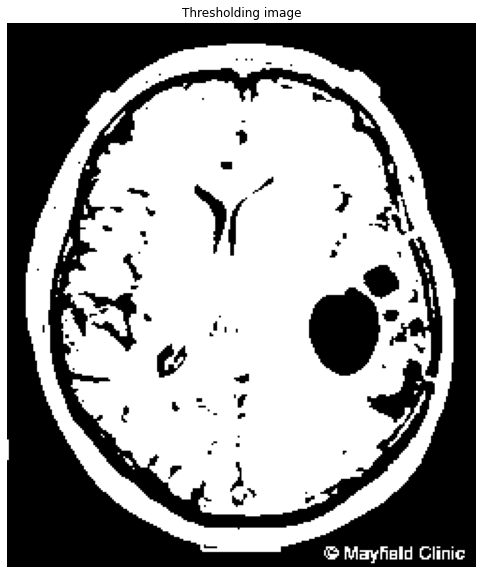

In [14]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y73.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

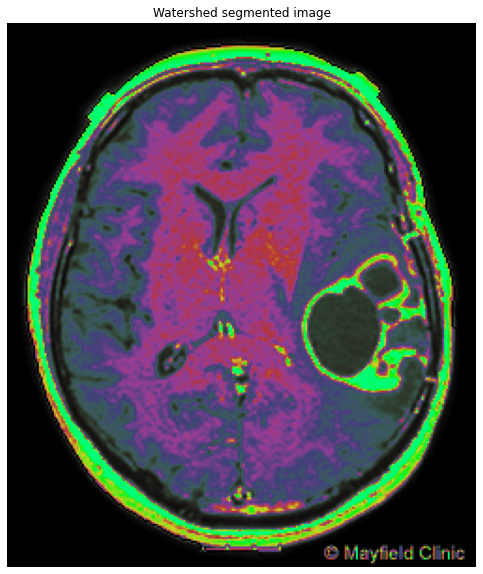

In [15]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y73.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

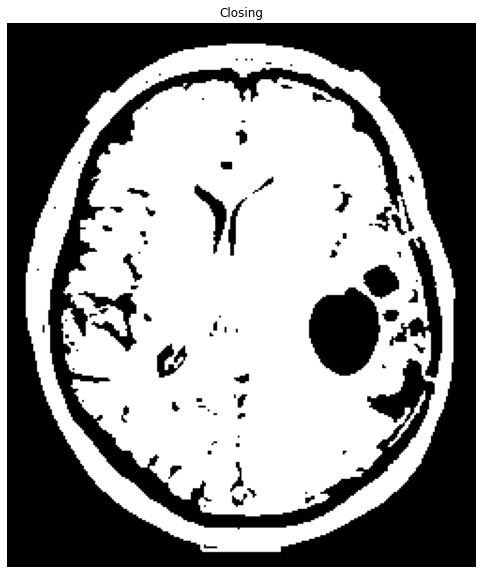

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 50**

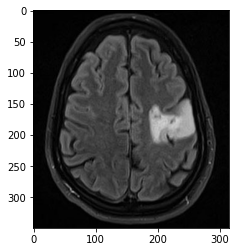

In [33]:
img5 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y50.JPG')

plt.imshow(img5)

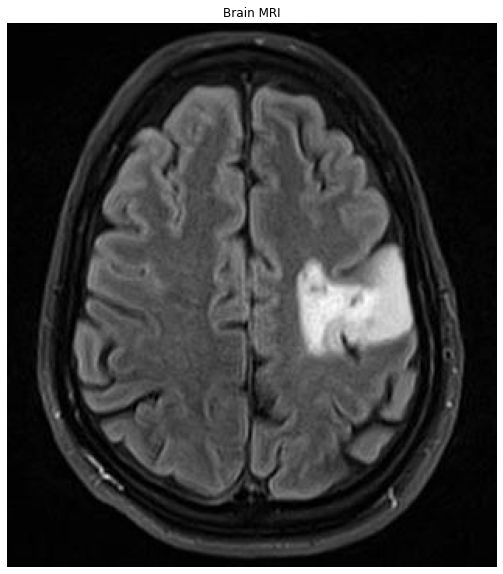

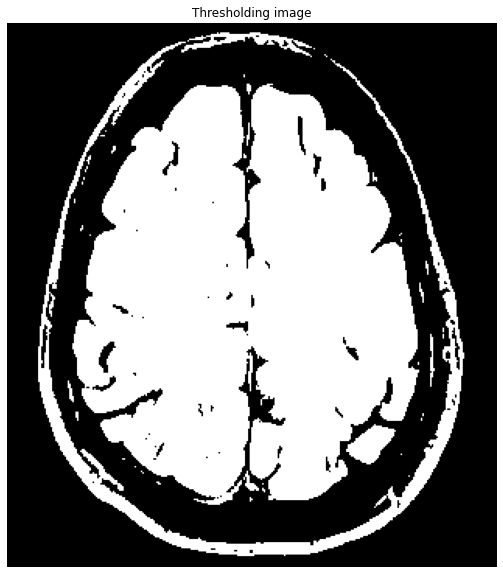

In [34]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y50.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

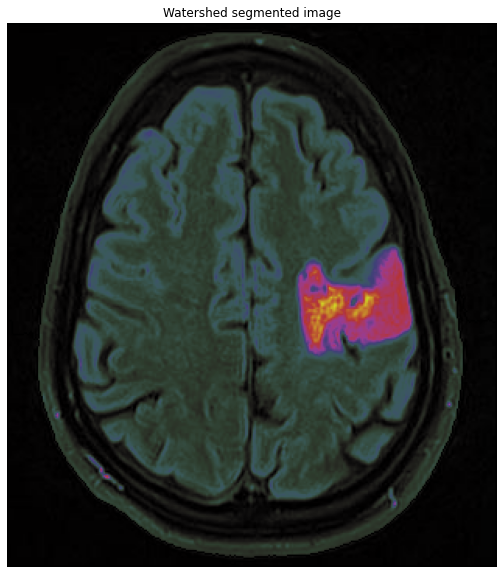

In [35]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y50.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

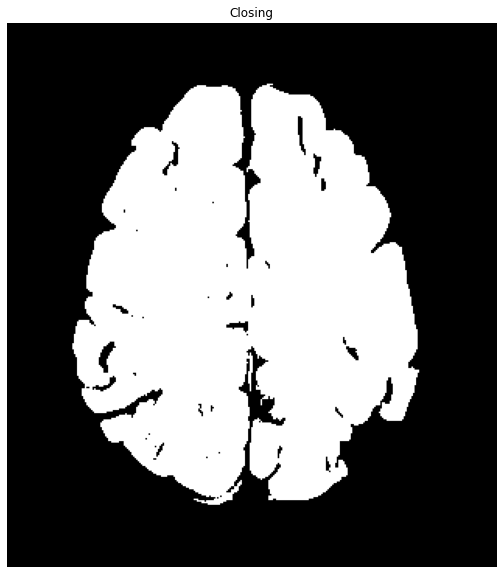

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 153**

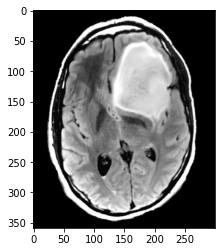

In [37]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y153.jpg')

plt.imshow(img7)

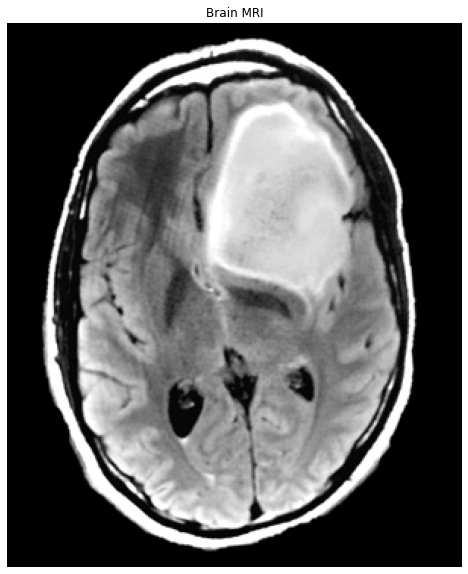

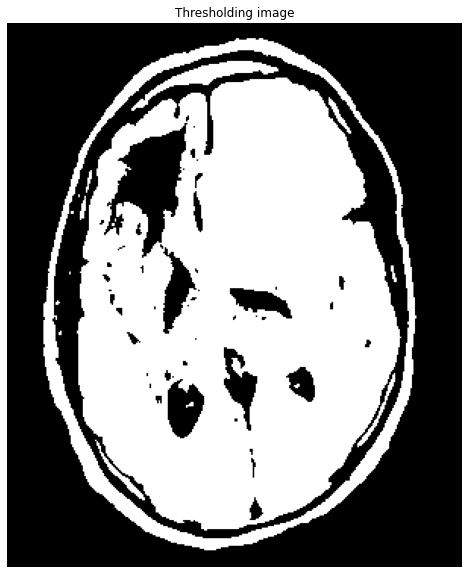

In [38]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y153.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

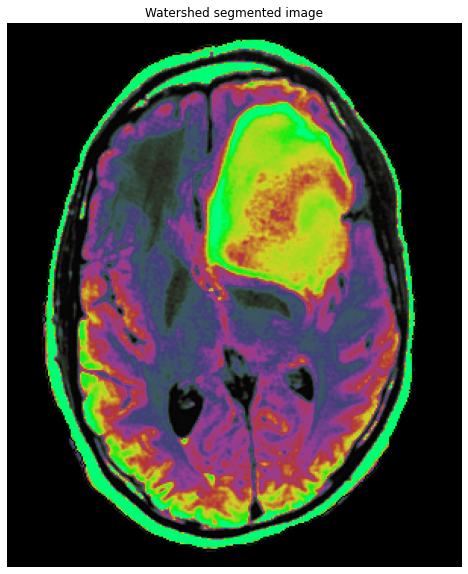

In [39]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y153.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

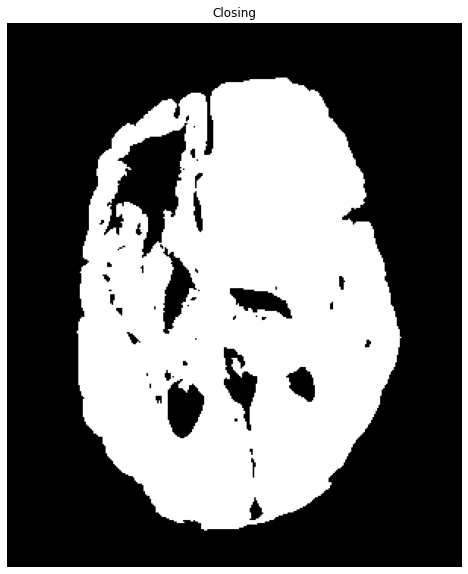

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 253**

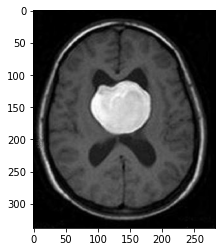

In [17]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y253.JPG')

plt.imshow(img7)

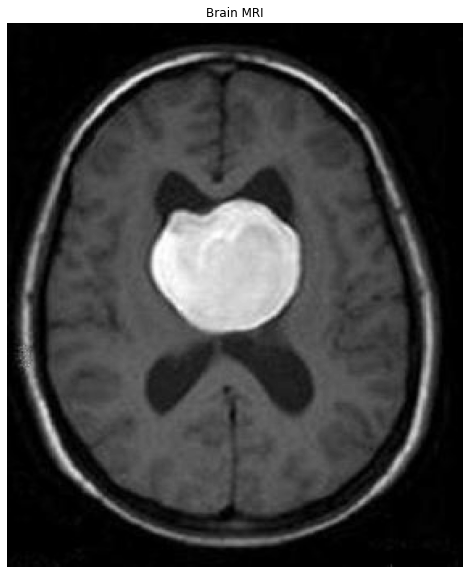

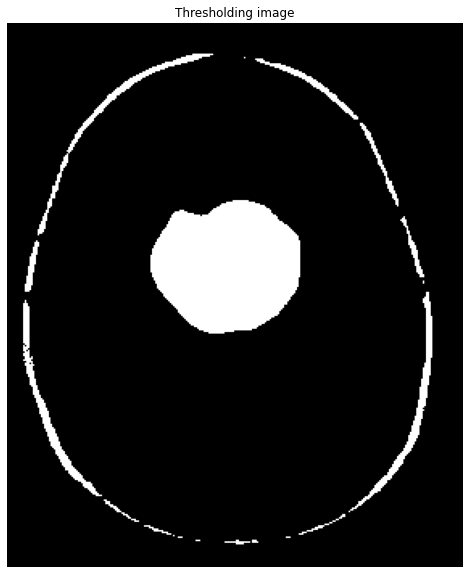

In [18]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y253.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

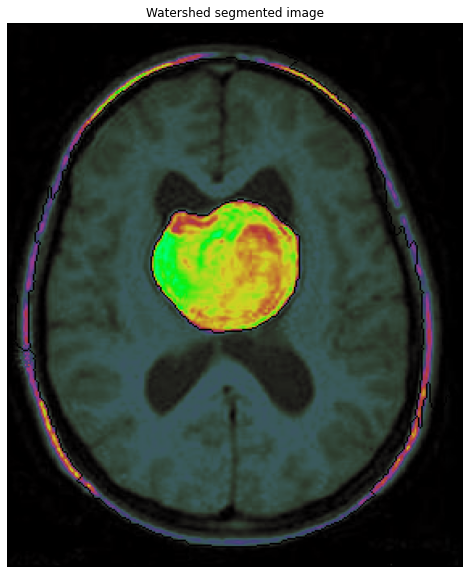

In [20]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y253.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

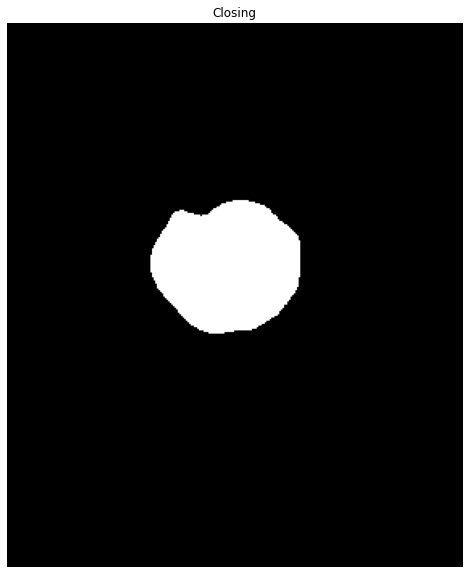

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 7**

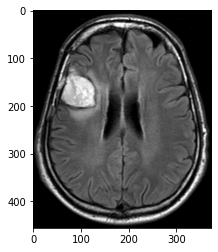

In [22]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y7.jpg')

plt.imshow(img7)

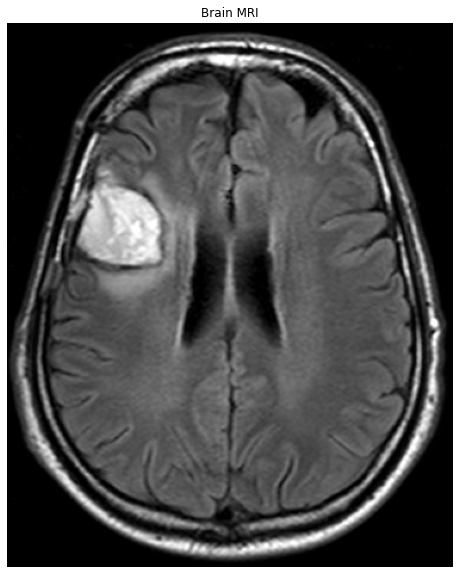

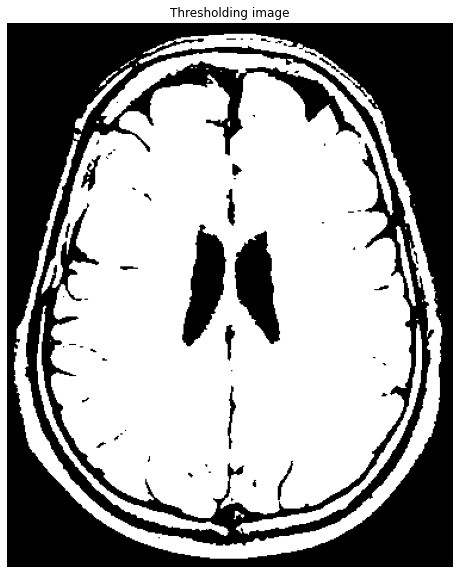

In [23]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y7.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

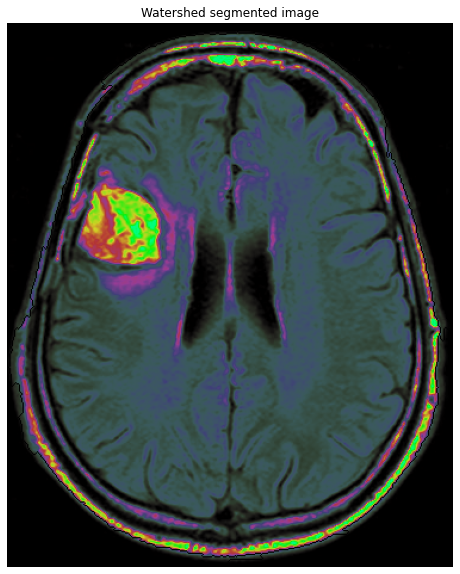

In [24]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y7.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

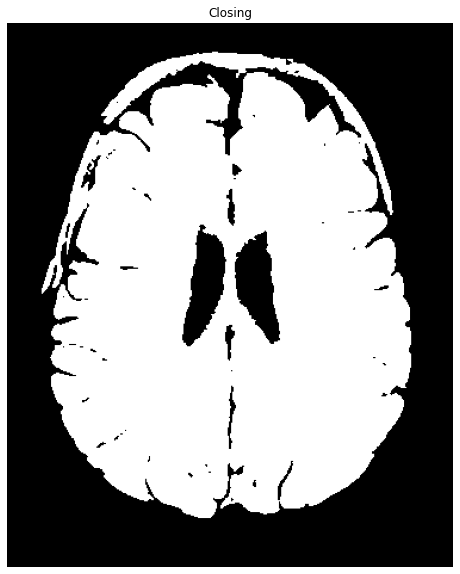

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 103**

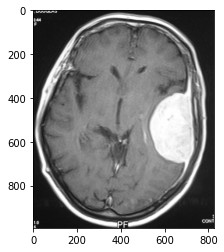

In [26]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y103.jpg')

plt.imshow(img7)

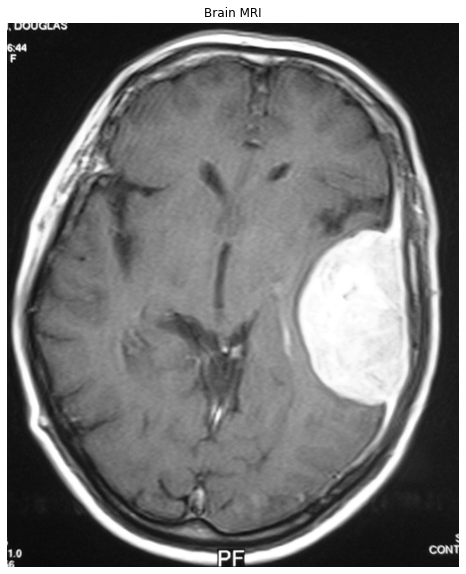

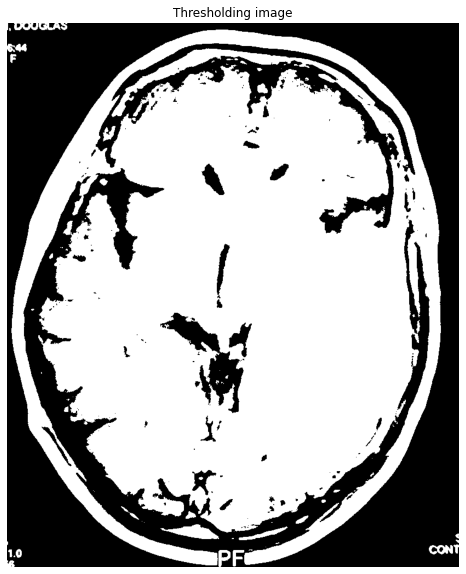

In [27]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y103.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

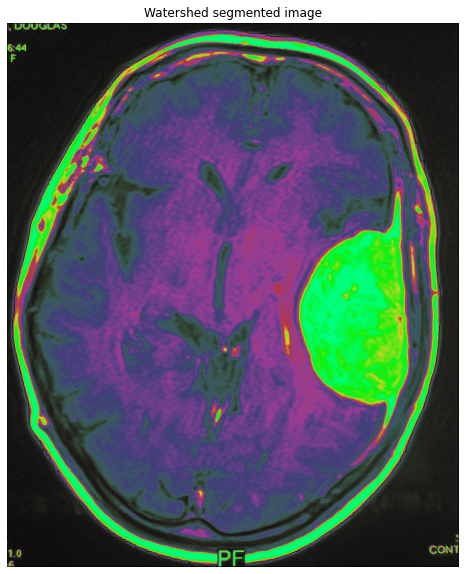

In [28]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y103.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

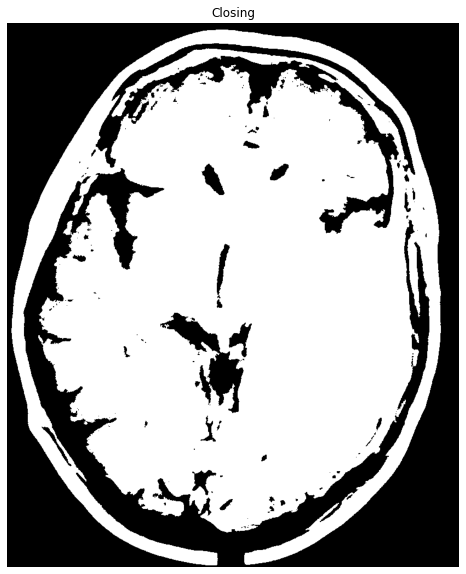

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 164**

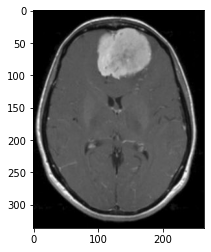

In [30]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y164.JPG')

plt.imshow(img7)

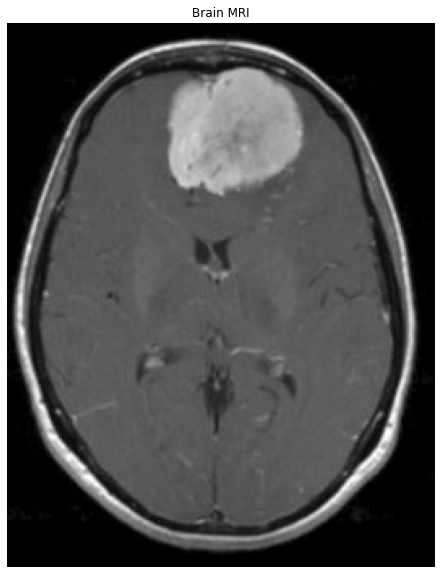

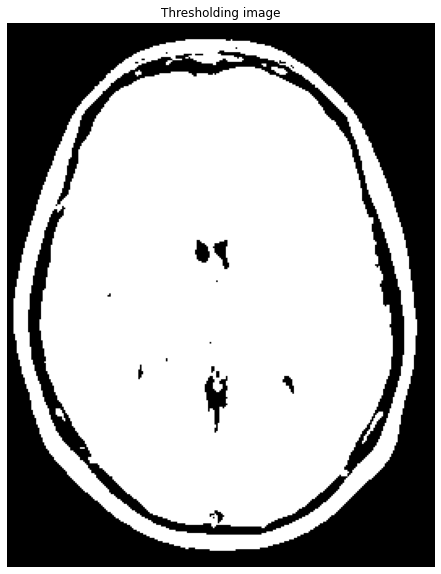

In [31]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y164.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

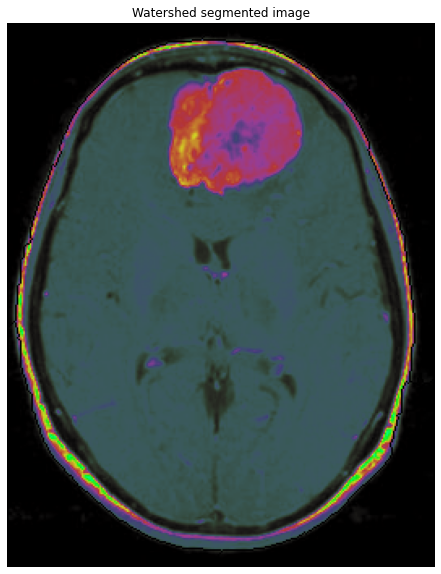

In [32]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y164.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

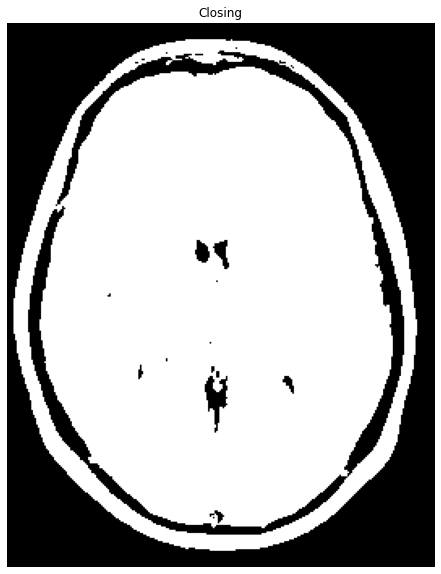

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 33**

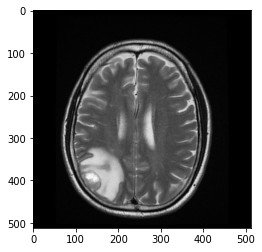

In [34]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y33.jpg')

plt.imshow(img7)

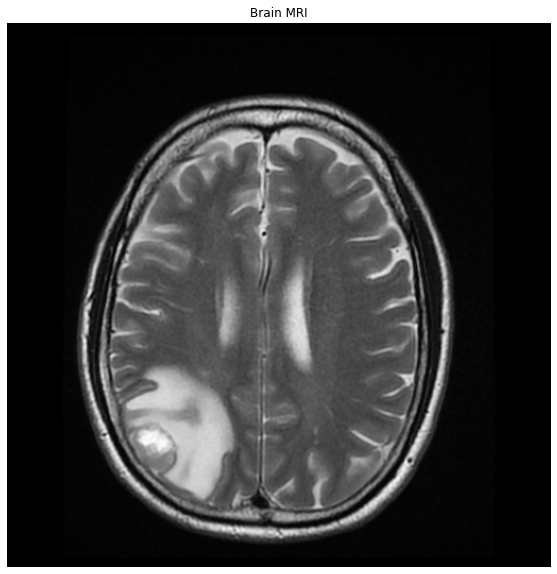

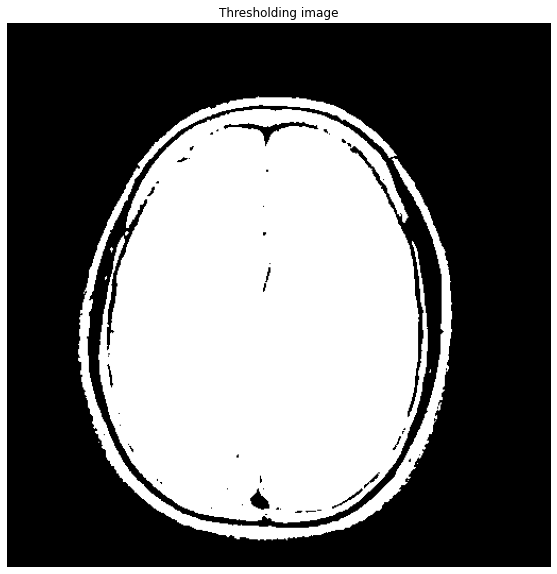

In [35]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y33.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

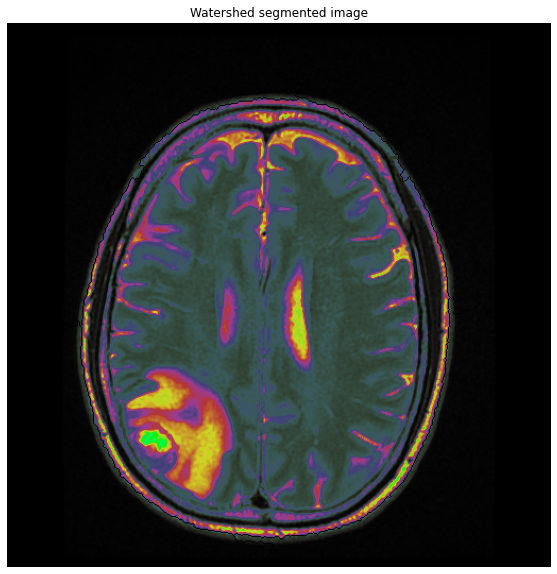

In [36]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y33.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

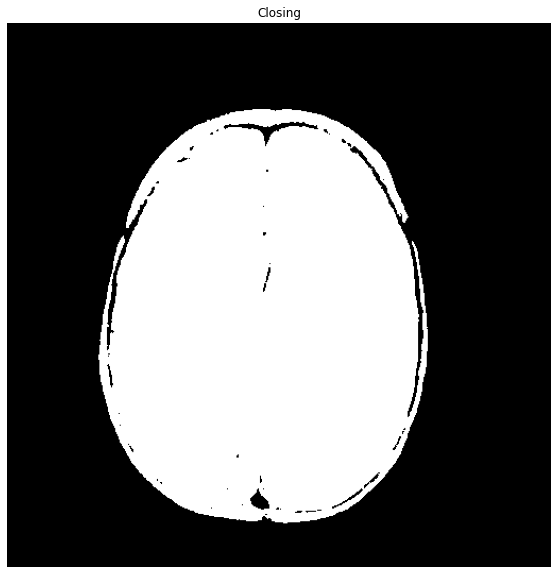

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test No. 8**

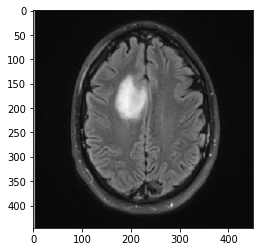

In [38]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y8.jpg')

plt.imshow(img7)

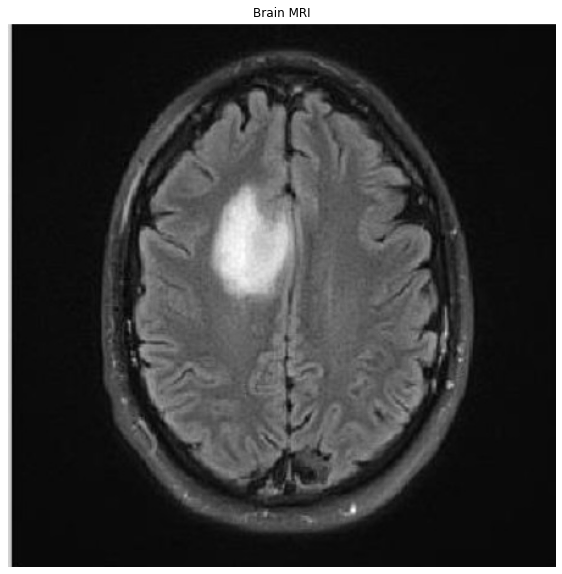

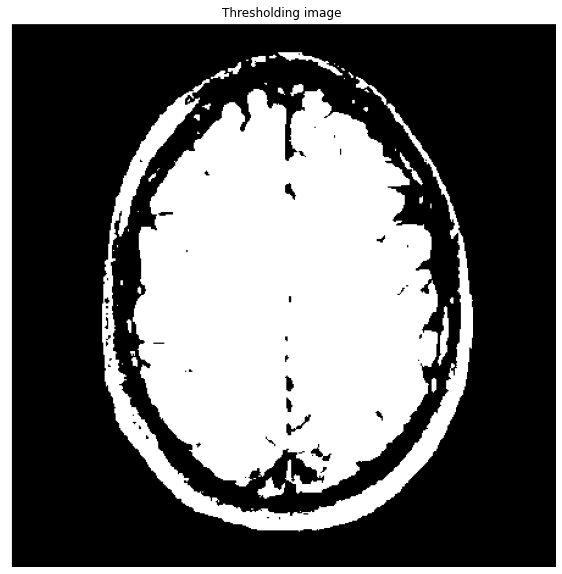

In [39]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

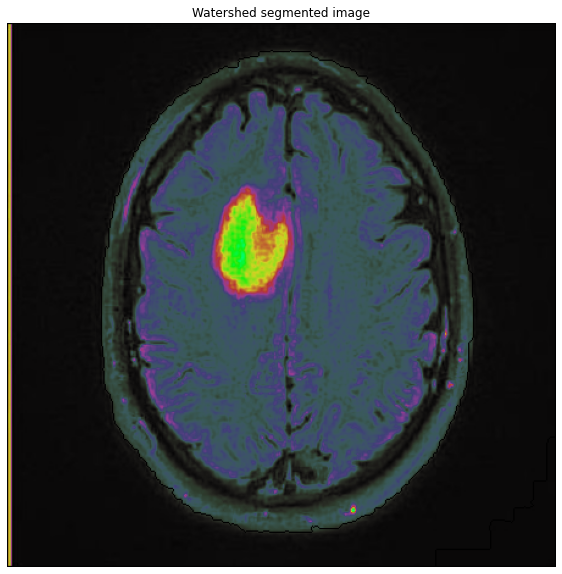

In [40]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

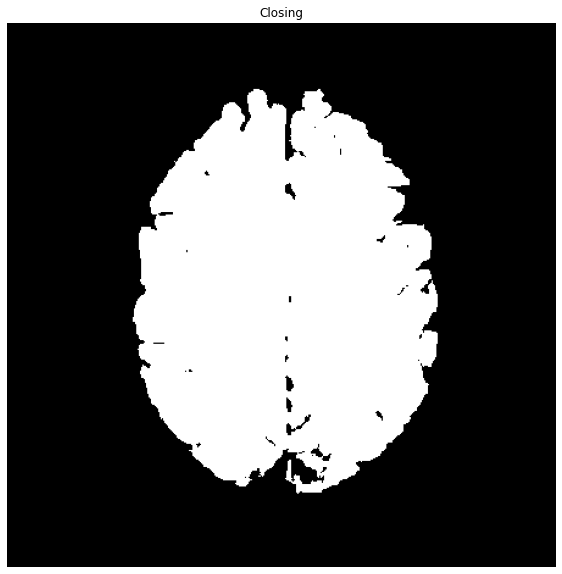

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)

### **Data Test N0. 97**

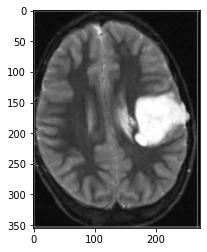

In [42]:
img7 = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y97.JPG')

plt.imshow(img7)

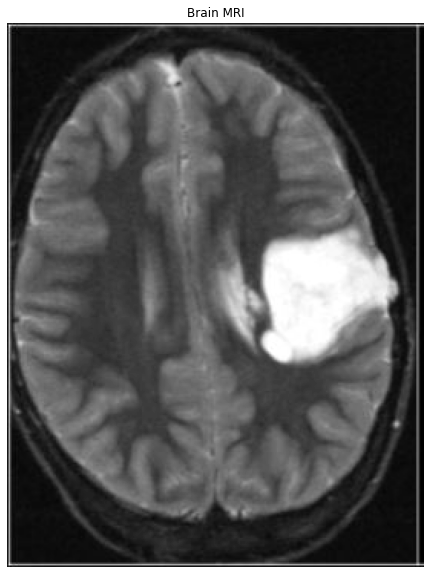

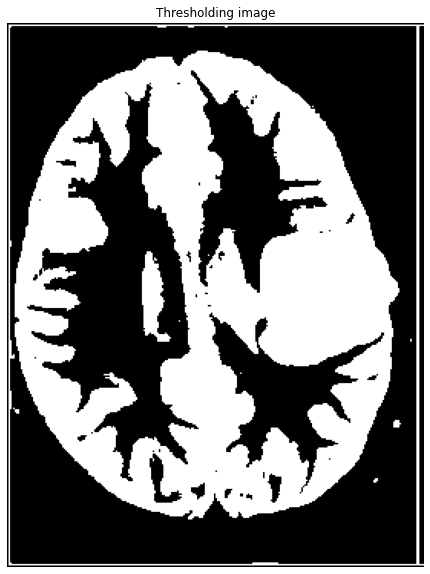

In [43]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y97.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI', gray, 'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
largest_component = np.argmax(marker_area)+1
brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

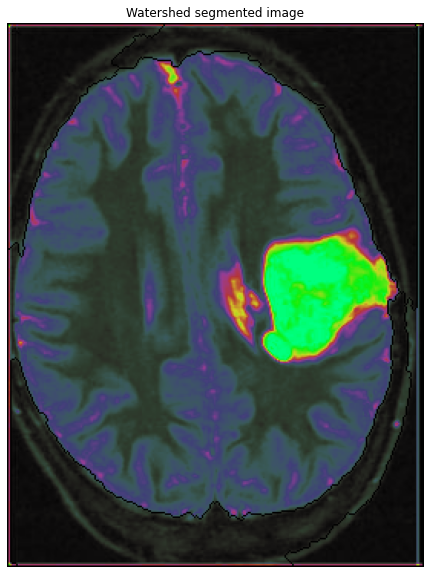

In [44]:
img = cv2.imread('/content/drive/MyDrive/Final Project/dataset/Y97.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Watershed segmented image',im1,'gray')

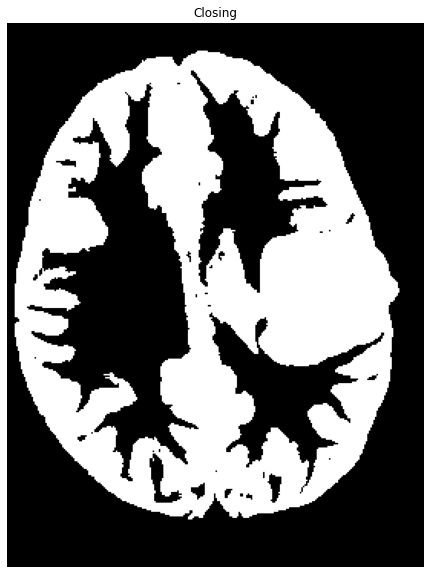

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
ShowImage('Closing', closing, 'gray')

brain_out = img.copy()
print(brain_mask)

brain_out[closing==False] = (0,0,0)